In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from math import sqrt

# 适应度函数计算
# f(x,y) = sin(sqrt(x^2 + y^2)) / sqrt(x^2 + y^2) +
# e^((cos(2πx) + cos(2πy))/2) -
# 2.71289
def fun(x, y):
    res = math.sin(sqrt(x ** 2 + y ** 2)) / sqrt(x ** 2 + y ** 2)\
        + math.e ** (math.cos(2 * math.pi * x) + math.cos(2 * math.pi * y)) / 2\
        - 2.71289
    return res


if __name__ == '__main__':
    ## 参数初始化
    # 速度更新参数
    c1 = 1.49445
    c2 = 1.49445

    # 进化次数
    maxgen = 300
    # 种群规模
    sizepop = 20
    # 个体和速度的最大最小值
    popmax = 2
    popmin = -2
    Vmax = 0.5
    Vmin = -0.5

    # 适应度
    fitness = []
    pops = []
    Vs = []
    gbest = np.zeros((sizepop, 2))

    ## 随机产生初始粒子和速度
    for i in range(sizepop):
        # 初始种群，位置和速度
        currentPop = np.random.uniform(-2, 2,  (1, 2))
        pops.append(currentPop)

        currentV = np.random.uniform(-0.5, 0.5,  (1, 2))
        Vs.append(currentV)
        # 粒子适应度计算
        res = fun(currentPop[0][0], currentPop[0][1])
        fitness.append(res)
    fitness = np.array(fitness)
    bestfitness, bestindex = np.max(fitness), np.argmax(fitness)
    # 最优值对应个体(x,y)
    zbest = pops[bestindex]
    gbest = pops
    # 最优值f(x,y)
    fitnesszbest = bestfitness
    fitnessbest = fitness
    print("zbest: %s" %(zbest))
    print("gbest: %s" %(gbest))
    print("fitnesszbest: %s" %(fitnesszbest))
    print("fitnessbest: %s" %(fitnessbest))

zbest: [[-1.96009971  1.06482558]]
gbest: [array([[1.91738515, 0.94386555]]), array([[0.68674537, 1.74469242]]), array([[-0.46641949, -1.01801551]]), array([[-1.90606327, -1.65652603]]), array([[-0.90892671, -1.9056917 ]]), array([[-0.23690507, -1.52009082]]), array([[ 0.16238332, -0.05063122]]), array([[-1.53841479,  0.12218262]]), array([[-1.96009971,  1.06482558]]), array([[-1.6356559 ,  0.74783744]]), array([[ 1.55393866, -0.29067465]]), array([[-0.71608583,  0.06087228]]), array([[0.98243657, 0.49059885]]), array([[-0.68968261,  0.8118888 ]]), array([[ 0.63301709, -1.61762848]]), array([[0.31672057, 0.78419746]]), array([[-0.33971701, -0.04854057]]), array([[ 1.39830661, -0.6292093 ]]), array([[-1.79664861, -0.31073265]]), array([[1.72395656, 0.49144257]])]
fitnesszbest: 0.9408321282860408
fitnessbest: [ 0.72718809 -1.87564667 -1.401205   -1.82462345  0.34985531 -1.86193075
  0.46333055 -1.67633939  0.94083213 -1.91583326 -1.92915366 -0.77338792
 -1.40425732 -1.3869828  -2.0230409

the zbest : [[-1.96009971  1.06482558]]


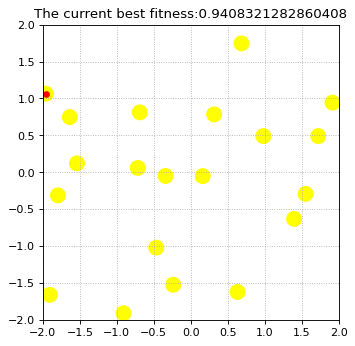

In [10]:
# 初始结果显示
# 设置图像大小、格式
fig1 = plt.figure(dpi=80)
plt.grid(linestyle="dotted")
axes = plt.gca()
axes.set_aspect(1)
# 设置坐标范围
plt.xlim(-2, 2)
plt.ylim(-2, 2)
for i in range(sizepop):
    # print("gbest[i] %s" %(gbest[i]))
    # x
    x = gbest[i][0][0]
    # y
    y = gbest[i][0][1]
    # 显示每个种群个体
    draw_circle = plt.Circle((x,y), 0.1, fill=True, color="yellow")
    plt.gcf().gca().add_artist(draw_circle)
# 标题，中文有乱码需要设置字体
plt.title('The current best fitness:%s' %(fitnesszbest))
# 显示极值点，标记为红色: c = color, zorder = 图像显示优先级
print('the zbest : %s' %(zbest))
plt.scatter(zbest[0][0], zbest[0][1], c='r', linewidths=0.1, zorder=2)



In [ ]:
for i in range(maxgen):
    for j in range(sizepop):
        Vs[j] = Vs[j] + c1*rand + c2*rand